# 6.2 Exploring Relationships

## AirBnB Data Set:

## Questions posed in the prior submission:
 - When does the rental market in Amsterdam Peak each year? (rental numbers, not revenue)
 - Which Months are the most expensive to visit amsterdam?
 - How does neighbourhood and property type impact price?
 - Which variables impact customer satisfication the most?

## Sections:
- Section 1: Library Importing / File Importing / File validation
- Section 2: Correlation heatmaps and scatterplots based on variables with strongest relationships
- Section 3: Pair Plots
- Section 4: Categorical Plots
- Section 5: Final Comments

### Section 1:

In [1]:
#Library importing:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#File pathway definition:

path = r'C:\Users\mojos\Documents\Career Foundry Course\Data Immersion\Section 6\AirBnB Amsterdam Project\AirBnB Data'
path2 = r'C:\Users\mojos\Documents\Career Foundry Course\Data Immersion\Section 6\AirBnB Amsterdam Project\AirBnB Visualizations'

In [2]:
#Importing Files from previous output

listings = pd.read_csv(os.path.join(path,'Prepared','listings_sub1K.csv'))
calendar = pd.read_csv(os.path.join(path,'Prepared','calendar_w_catagories.csv'))

#### Listings re-checking data for issues

In [3]:
listings.columns

Index(['Unnamed: 0', 'id', 'name', 'summary', 'host_id', 'host_is_superhost',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_location', 'review_scores_value',
       'instant_bookable', 'reviews_per_month', 'rated', 'pricing_tier',
       'group_size', 'groupsize_pricing_combined', 'distance_from_center'],
      dtype='object')

In [4]:
listings.dtypes

Unnamed: 0                      int64
id                              int64
name                           object
summary                        object
host_id                         int64
host_is_superhost              object
neighbourhood_cleansed         object
latitude                      float64
longitude                     float64
property_type                  object
room_type                      object
accommodates                    int64
bedrooms                      float64
beds                          float64
bed_type                       object
amenities                      object
price                         float64
guests_included                 int64
minimum_nights                  int64
maximum_nights                  int64
availability_365                int64
number_of_reviews               int64
review_scores_rating          float64
review_scores_location        float64
review_scores_value           float64
instant_bookable               object
reviews_per_

In [5]:
listings.isnull().sum()  #Name / Summary aren't important fields to this exercise, neither is superhost details - so no clean up required

Unnamed: 0                      0
id                              0
name                           27
summary                       433
host_id                         0
host_is_superhost               2
neighbourhood_cleansed          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
price                           0
guests_included                 0
minimum_nights                  0
maximum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating            0
review_scores_location          0
review_scores_value             0
instant_bookable                0
reviews_per_month               0
rated                           0
pricing_tier                    0
group_size    

In [6]:
#Checking for duplicates
listings_dupes =  listings[listings.duplicated()]
listings_dupes.shape 
#No Dupes

(0, 32)

In [7]:
#Checking for mixed data types
for col in listings.columns.tolist():
      weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (listings[weird]) > 0:
        print (col)

name
summary
host_is_superhost


C:\Users\mojos\AppData\Local\Temp\ipykernel_32072\723482308.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_32072\723482308.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_32072\723482308.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_32072\723482308.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\mojos\AppData\L

In [8]:
#Based on output of above, recorrecting the following datatypes
        
listings['name'] = listings['name'].astype('str')
listings['summary'] = listings['summary'].astype('str')
listings['host_is_superhost'] = listings['host_is_superhost'].astype('str')

listings.dtypes

Unnamed: 0                      int64
id                              int64
name                           object
summary                        object
host_id                         int64
host_is_superhost              object
neighbourhood_cleansed         object
latitude                      float64
longitude                     float64
property_type                  object
room_type                      object
accommodates                    int64
bedrooms                      float64
beds                          float64
bed_type                       object
amenities                      object
price                         float64
guests_included                 int64
minimum_nights                  int64
maximum_nights                  int64
availability_365                int64
number_of_reviews               int64
review_scores_rating          float64
review_scores_location        float64
review_scores_value           float64
instant_bookable               object
reviews_per_

#### Calendar re-checking data for issues

In [9]:
calendar.columns

Index(['Unnamed: 0', 'id', 'date', 'available', 'price',
       'neighbourhood_cleansed', 'groupsize_pricing_combined', '_merge'],
      dtype='object')

In [10]:
calendar.dtypes

Unnamed: 0                      int64
id                              int64
date                           object
available                      object
price                         float64
neighbourhood_cleansed         object
groupsize_pricing_combined     object
_merge                         object
dtype: object

In [11]:
calendar.isnull().sum()  #Name / Summary aren't important fields to this exercise, neither is superhost details - so no clean up required

Unnamed: 0                    0
id                            0
date                          0
available                     0
price                         0
neighbourhood_cleansed        0
groupsize_pricing_combined    0
_merge                        0
dtype: int64

In [12]:
#Checking for duplicates
calendar_dupes = calendar[calendar.duplicated()]
calendar_dupes.shape 
#No Dupes

(0, 8)

In [13]:
#Checking for mixed data types
for col in calendar.columns.tolist():
      weird = (calendar[[col]].applymap(type) != calendar[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (calendar[weird]) > 0:
        print (col)
        
#No Mixed data Types

C:\Users\mojos\AppData\Local\Temp\ipykernel_32072\3919334154.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (calendar[[col]].applymap(type) != calendar[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_32072\3919334154.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (calendar[[col]].applymap(type) != calendar[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_32072\3919334154.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (calendar[[col]].applymap(type) != calendar[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_32072\3919334154.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (calendar[[col]].applymap(type) != calendar[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\mojos\AppDa

### Section 2:

#### Main quantitative data options:
accommodates (as well as beds + bedrooms), price, availability_365, number_of_reviews, review_scores_rating, review_scores_value.

There are other numeric values we could use, but I don't think they are particularly pertinent - The list offered above provides the most versatility when approaching the project requirements.

### Correlation Matrix:

In [14]:
#creating a dataset of only the reviewed quantitative variables:

listings_quant = listings[['accommodates','beds','bedrooms','minimum_nights', 'maximum_nights','price','availability_365','number_of_reviews','review_scores_rating','review_scores_value','review_scores_location','reviews_per_month','distance_from_center']]

In [15]:
listings_quant.corr()

accommodates      beds  bedrooms  minimum_nights  \
accommodates                1.000000  0.814409  0.726073        0.006366   
beds                        0.814409  1.000000  0.765557        0.007155   
bedrooms                    0.726073  0.765557  1.000000        0.018458   
minimum_nights              0.006366  0.007155  0.018458        1.000000   
maximum_nights              0.004481 -0.023722 -0.014553       -0.004474   
price                       0.534921  0.474320  0.494310       -0.001615   
availability_365            0.041690  0.071854 -0.015777        0.045358   
number_of_reviews          -0.059231 -0.027119 -0.108908       -0.016939   
review_scores_rating       -0.041660 -0.032817  0.017383       -0.002254   
review_scores_value        -0.056778 -0.034612  0.006939        0.007668   
review_scores_location     -0.047730 -0.043916 -0.032928        0.014184   
reviews_per_month          -0.078386 -0.062504 -0.159115       -0.038963   
distance_from_center        0.052230  0.087401  0.100999       -0.005346   

                        maximum_nights     price  availability_365  \
accommodates                  0.004481  0.534921          0.041690   
beds                         -0.023722  0.474320          0.071854   
bedrooms                     -0.014553  0.494310         -0.015777   
minimum_nights               -0.004474 -0.001615          0.045358   
maximum_nights                1.000000  0.006620         -0.003714   
price                         0.006620  1.000000          0.163465   
availability_365             -0.003714  0.163465          1.000000   
number_of_reviews            -0.052706 -0.093633          0.284122   
review_scores_rating         -0.072351  0.061572         -0.020135   
review_scores_value          -0.054135 -0.003238         -0.033586   
review_scores_location       -0.018420  0.151155          0.045823   
reviews_per_month            -0.031766 -0.111010          0.265424   
distance_from_center         -0.041694 -0.201507         -0.001672   

                        number_of_reviews  review_scores_rating  \
accommodates                    -0.059231             -0.041660   
beds                            -0.027119             -0.032817   
bedrooms                        -0.108908              0.017383   
minimum_nights                  -0.016939             -0.002254   
maximum_nights                  -0.052706             -0.072351   
price                           -0.093633              0.061572   
availability_365                 0.284122             -0.020135   
number_of_reviews                1.000000              0.005744   
review_scores_rating             0.005744              1.000000   
review_scores_value              0.020560              0.684630   
review_scores_location           0.054345              0.354822   
reviews_per_month                0.639555              0.017881   
distance_from_center            -0.049002             -0.007710   

                        review_scores_value  review_scores_location  \
accommodates                      -0.056778               -0.047730   
beds                              -0.034612               -0.043916   
bedrooms                           0.006939               -0.032928   
minimum_nights                     0.007668                0.014184   
maximum_nights                    -0.054135               -0.018420   
price                             -0.003238                0.151155   
availability_365                  -0.033586                0.045823   
number_of_reviews                  0.020560                0.054345   
review_scores_rating               0.684630                0.354822   
review_scores_value                1.000000                0.371950   
review_scores_location             0.371950                1.000000   
reviews_per_month                  0.008120                0.068363   
distance_from_center               0.012253               -0.374013   

                        reviews_per_month  d

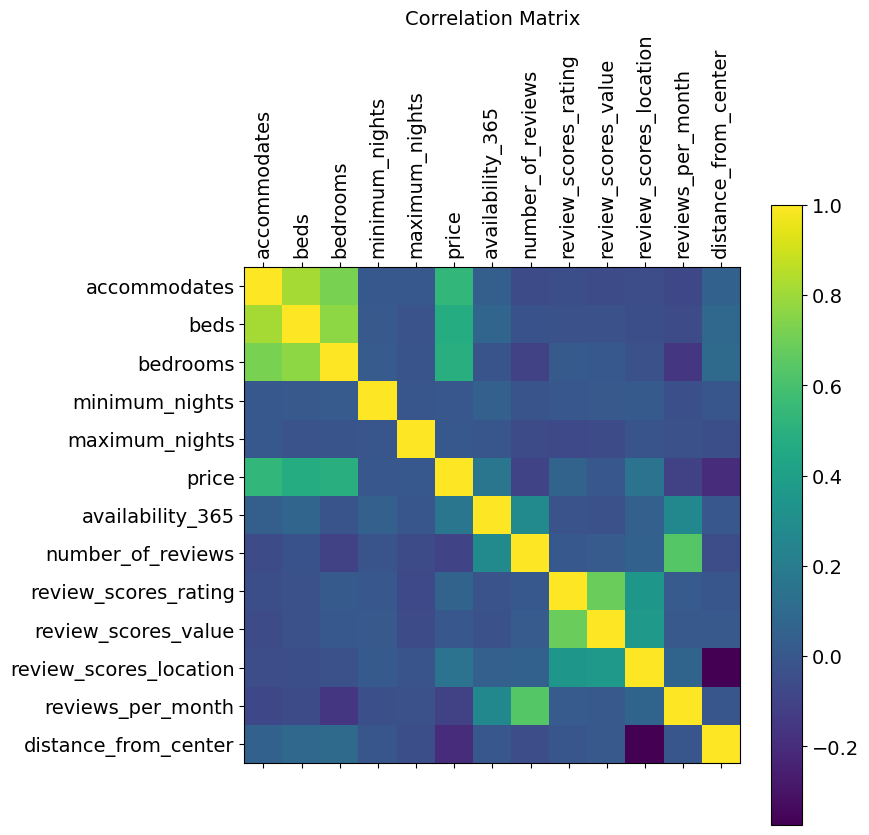

In [16]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(listings_quant.corr(), fignum=f.number) # type of plot
plt.xticks(range(listings_quant.shape[1]), listings_quant.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(listings_quant.shape[1]), listings_quant.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig(os.path.join(path2, 'ListingsCorrelation.png'),bbox_inches='tight')

#### Based on the correlation Heatmap, there are a few areas worth highlighting based on the correlation score. The top left corner can mostly be discarded, as N. of beds/rooms would inevitably correlate with higher accommodates values. The first real scores to review are the moderate to strong relationship between price and the number of beds/bedrooms/guests that can be accommodated. This isn't fully a surprise, but it's interesting to see a minor difference between large room counts (which would indicate privacy) compared to just accomodating more by having extra beds. There is obviously more to it the overall correlation score as the data at this stage contains values across all pricing catagories, and inevitably, there will be some high-end central properties which may only accomodated 1 or 2 guests.

#### There is a weak relationship between price and availability_365 as well as the number of reviews and the availability_365 value. availability_365 represents the amount of days the listing is available to be rented for over the upcoming year. The data source does not indicate if lack of availability is down to existing bookings or pulled off the site due to landlord request. 

#### Another strong correlation found in this image is between review_score_rating and the review_score_value variables, however since they both come from user review numbers, they are likely to share the same sentiment (e.g someone saying a property is bad value would not go on to rate it extremely well) and therefor won't provide too much value.

#### The last relationship to discuss is around review_score_location. Just like the other reviews, this variable is subjective, but there is an objective aspect in it in that if the location has the necessary amenities and good access to the hotspots then it would presumably rank high regardless of the property quality (by which I mean, Location is only dependant on external/environment aspects, where as value would be affect by an array of factors). Regardless, Location review & price are only shown to have a weak relationship at the present. On the other hand, there is a moderate relationship between location score and other review scores. This may indicate that location is quite a strong component in overall customer satisfaction, but is of course not the only factor. it'll be interesting how this relationship changes when reviewing things on a neighbourhood level. 

#### Because of the table above the visualization we can see that the relationships lean to the positive end of the spectrum, rather than negative.

#### I'm not particularly surprised by the lack of relationships made evident at the moment - I think perhapse if the dataset was split by another factor (e.g into the neighbourhoods) we would perhaps have some more clarity on the relationships.

### Creating Scatterplots for the variables with the 'strongest' or most 'relevant' relationships:

- accommodates / beds (potentially irrelevant - obvious relationship) -- strong
- accommodates / bedrooms (potentially irrelevant - obvious relationship) -- strong
- price / accommodates -- strong - TO REVIEW
- price / availability_365 -- weak - TO REVIEW
- price / review_scores_location -- Weak - TO REVIEW
- availability_365 / number_of_reviews -- moderate
- reviews_per_month / availability_365 -- moderate
- number_of_reviews / reviews_per_month -- strong, but obvious relationship
- review_scores_rating / review_scores_value -- strong, but obvious relationship
- review_scores_rating / review_scores_location -- moderate

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


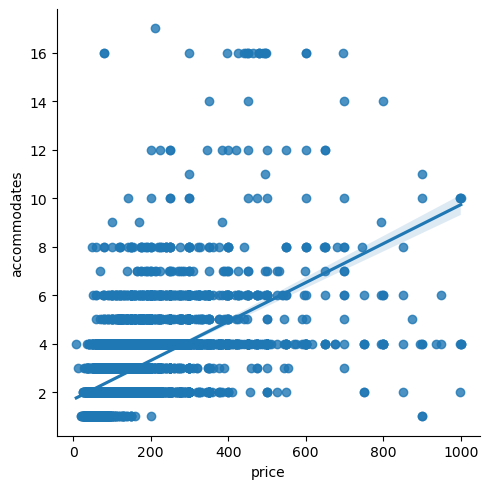

In [17]:
# Create a scatterplot for the "price" and "accommodates" columns in seaborn.
# Accommodates can be used as a standin for the beds/bedroom values as they mostly act as the same measure.

price_accommodates = sns.lmplot(x = 'price', y = 'accommodates', data = listings)
price_accommodates.figure.savefig(os.path.join(path2,'Line_accommodates_price.png'),bbox_inches='tight')
price_accommodates

#### Despite a strong correlation value, the data above has a high degree of variance, and some interesting outliers (e.g 75~ Euro price per night, accomodating 16 guests) - In spite of this, the smaller properties (1 guest) are no longer present above 150~ Euro, and we can visibly see that the starting price for proprties that can accommodate large groups does tend to start marginally higher (e.g 2 guests, 25~ / 6 guests, 50~ / 10 guests, 150~)

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


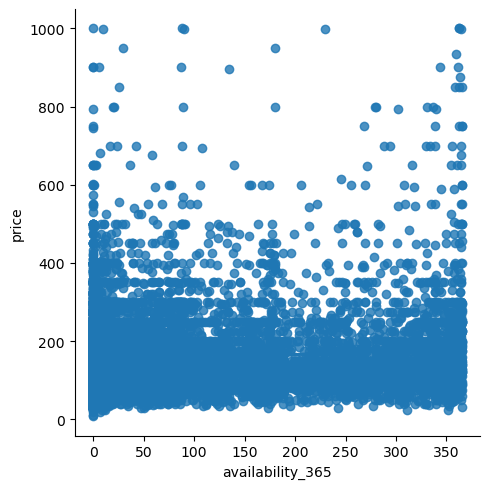

In [18]:
price_availability365 = sns.lmplot(x = 'availability_365', y = 'price', data = listings)
price_availability365.figure.savefig(os.path.join(path2,'Line_price_availability365.png'),bbox_inches='tight')
price_availability365

#### Weak relationship, the values are spread with no clear pattern - Based on the concentration closer to either end of availability_365 values, Im inclined to believe that perhaps availability_365 isn't a strong value to pin our analysis on.

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


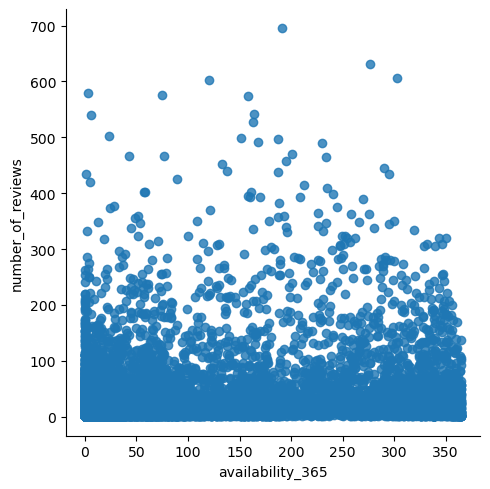

In [19]:
availability365_numreviews = sns.lmplot(x = 'availability_365', y = 'number_of_reviews', data = listings)
availability365_numreviews.figure.savefig(os.path.join(path2,'Line_availability365_numreviews.png'),bbox_inches='tight')
availability365_numreviews

#### Using availability_365 as a variable, despite the moderate correlation, doesn't really indicate the true nature of the relationship and I think that's because of the timeliness limitations of both values - N of reviews represents past data, availability_365 represents availability in the upcoming season. An assumption could be made that availability would perhaps remain consistent overtime (unless there were planned maintenance or something which would halt the listing being up) and therefore the moderate relationship could perhaps incinuate that if a property was available to be rented for a longer portion of the year, there is more chance that multiple rentals could occur (and subsequently reviews) but there isn't enough data to support that assumption at the current stage.

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


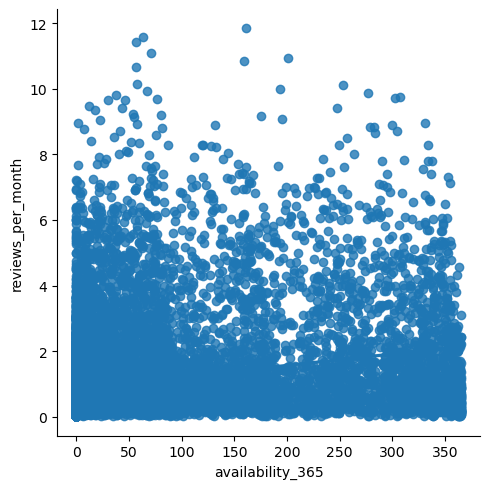

In [20]:
availability365_reviews_month = sns.lmplot(x = 'availability_365', y = 'reviews_per_month', data = listings)
availability365_reviews_month.figure.savefig(os.path.join(path2,'Line_availability365_reviews_month.png'),bbox_inches='tight')
availability365_reviews_month

#### Again, no trend. Huge variance, and I think it's again because reviews_per_month is based off total reviews / months listed on AirBnb. Availability is based on future availability - I would have assumed that perhaps if a host has decided to list their property year round, then they would have a larger quantity of clients and therefore a higher review count average BUT because it's future availability rather than past, there isn't much to gleen from this.

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


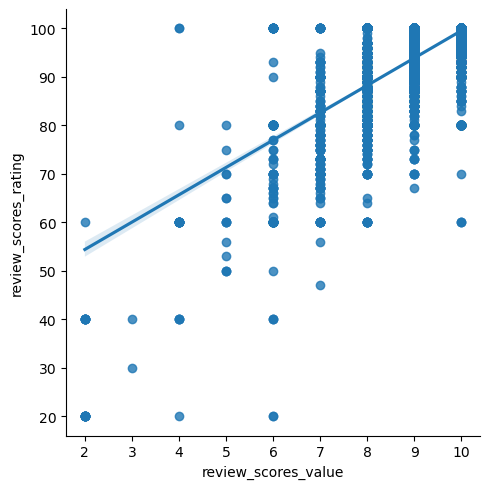

In [21]:
review_value_review_rating = sns.lmplot(x = 'review_scores_value', y = 'review_scores_rating', data = listings)
review_value_review_rating.figure.savefig(os.path.join(path2,'Line_review_value_review_rating.png'),bbox_inches='tight')
review_value_review_rating
#Just to re-iterate, despite the strong correlation - it's expected, so there won't be any need to continue with this combination.

#### Just to re-iterate, despite the strong correlation - it's expected, so there won't be any need to continue with this combination.

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


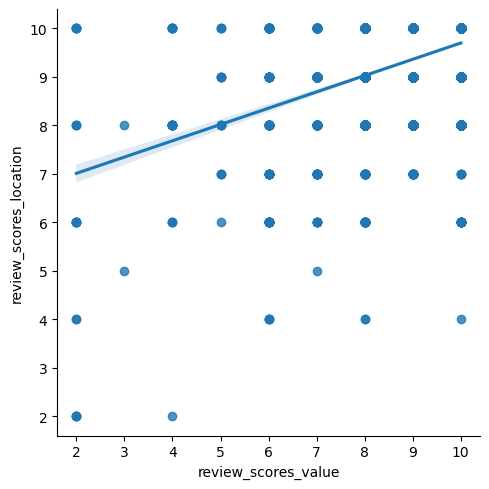

In [22]:
review_value_review_location = sns.lmplot(x = 'review_scores_value', y = 'review_scores_location', data = listings)
review_value_review_location.figure.savefig(os.path.join(path2,'Line_review_value_review_location.png'),bbox_inches='tight')
review_value_review_location

#### The spread of datapoints is rather wide, though there is a concentration around the top right of the data set. Whilst there are outliers that deviate from the general cluster previously described. Whilst there is only a moderate relationship between the variables, it's interesting to see that the outliers tend to vary more in the overall 'value' value then they do in the 'location' aspect of the reviews. Sentiments on location may generally be universal and 'objective' (despite the fact that this is ofcourse data built on subjective opinions) where as 'value' is a culmination of further factors (price, amenities, location, quality of service etc. etc.)

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


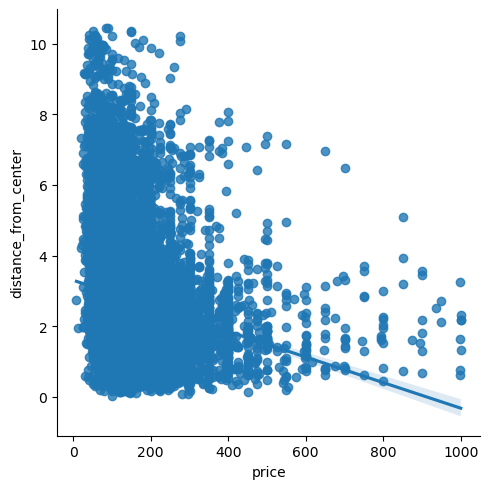

In [23]:
price_distance = sns.lmplot(x = 'price', y = 'distance_from_center', data = listings)
price_distance.figure.savefig(os.path.join(path2,'price_distance.png'),bbox_inches='tight')
price_distance

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


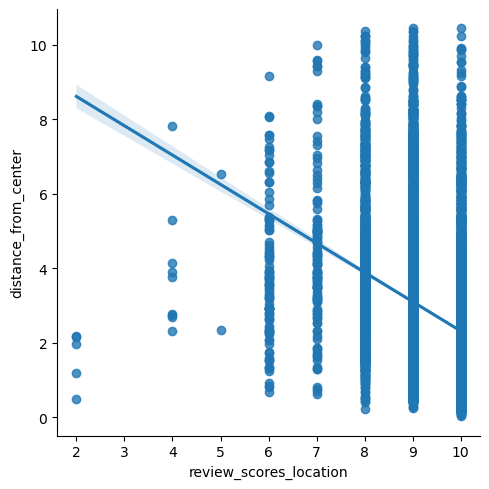

In [24]:
review_location_distance = sns.lmplot(x = 'review_scores_location', y = 'distance_from_center', data = listings)
review_location_distance.figure.savefig(os.path.join(path2,'review_location_distance.png'),bbox_inches='tight')
review_location_distance

#### Below, I've decided to briefly create a smaller dataframe using aggregation on each neighbourhood and room, just to try and understand how individual subsections of the data behave when performing a correlation. Because of the variety of combinations available in the data set I don't fully see a generic correlation as proving / disproving relationships.

In [25]:
nbhood_av_loc_score = listings.groupby('neighbourhood_cleansed').agg({'review_scores_location' : 'mean', 'price' : 'mean'})
nbhood_av_loc_score.sort_values(by='review_scores_location', ascending = False)

review_scores_location       price
neighbourhood_cleansed                                                    
Centrum-West                                          9.896787  183.965920
Centrum-Oost                                          9.753186  177.022803
De Pijp - Rivierenbuurt                               9.619981  150.761905
De Baarsjes - Oud-West                                9.476744  140.968023
Zuid                                                  9.470882  161.311148
Westerpark                                            9.396513  139.879454
Oud-Oost                                              9.323684  135.337719
IJburg - Zeeburgereiland                              9.205882  151.676471
Oostelijk Havengebied - Indische Buurt                9.184397  125.871158
Watergraafsmeer                                       9.164835  136.263736
Oud-Noord                                             9.072144  144.965932
Noord-Oost                                            9.018868  114.811321
Bos en Lommer                                         9.010000  115.167000
De Aker - Nieuw Sloten                                8.945946  116.486486
Slotervaart                                           8.934524  113.354167
Noord-West                                            8.930147  113.805147
Buitenveldert - Zuidas                                8.865000  135.035000
Geuzenveld - Slotermeer                               8.739884  112.618497
Gaasperdam - Driemond                                 8.724771   89.311927
Bijlmer-Centrum                                       8.693182   96.488636
Osdorp                                                8.585714   93.678571
Bijlmer-Oost                                          8.451220   95.731707

In [26]:
nbhood_av_rating_score = listings.groupby('neighbourhood_cleansed').agg({'review_scores_rating' : 'mean'})
nbhood_av_rating_score.sort_values(by='review_scores_rating', ascending = False)

review_scores_rating
neighbourhood_cleansed                                      
De Aker - Nieuw Sloten                             95.747748
IJburg - Zeeburgereiland                           95.660428
Zuid                                               95.559068
Bos en Lommer                                      95.359000
De Baarsjes - Oud-West                             95.281977
Oud-Oost                                           95.228947
Slotervaart                                        95.074405
Westerpark                                         95.072782
Noord-West                                         95.003676
Watergraafsmeer                                    94.931868
De Pijp - Rivierenbuurt                            94.905229
Oostelijk Havengebied - Indische Buurt             94.699764
Centrum-Oost                                       94.611670
Centrum-West                                       94.247809
Noord-Oost                                         94.037736
Oud-Noord                                          93.805611
Gaasperdam - Driemond                              93.522936
Geuzenveld - Slotermeer                            93.520231
Bijlmer-Centrum                                    92.818182
Bijlmer-Oost                                       92.743902
Buitenveldert - Zuidas                             92.600000
Osdorp                                             91.735714

In [27]:
nbhood_room_av = pd.crosstab(listings['neighbourhood_cleansed'], listings['room_type'], values=listings['price'], aggfunc='mean')
nbhood_room_av = nbhood_room_av.rename(columns = {'Entire home/apt': 'Entire home Price','Private room': 'Private room price','Shared room': 'Shared room price'})
nbhood_crosstab = pd.crosstab(listings['neighbourhood_cleansed'],listings['room_type'],dropna=False)
nbhood_crosstab = nbhood_crosstab.rename(columns = {'Entire home/apt': 'Entire home count','Private room': 'Private room count','Shared room': 'Shared room count'})
frames = [nbhood_room_av,nbhood_crosstab,nbhood_av_loc_score,nbhood_av_rating_score]
nbhood_room_price_count = pd.concat(frames,axis = 1)
nbhood_room_price_count = nbhood_room_price_count[['Entire home count','Entire home Price','Private room count','Private room price','Shared room count','Shared room price','review_scores_location','review_scores_rating','price']]
nbhood_room_price_count = nbhood_room_price_count.drop(columns = ['price'])
nbhood_room_price_count.sort_values(by = ['review_scores_location'], ascending=False)

Entire home count  Entire home Price  \
neighbourhood_cleansed                                                         
Centrum-West                                         1475         205.395932   
Centrum-Oost                                         1116         196.523297   
De Pijp - Rivierenbuurt                              1821         161.198243   
De Baarsjes - Oud-West                               2600         150.801154   
Zuid                                                  998         170.906814   
Westerpark                                           1163         146.319862   
Oud-Oost                                              984         142.337398   
IJburg - Zeeburgereiland                              273         176.472527   
Oostelijk Havengebied - Indische Buurt                691         133.253256   
Watergraafsmeer                                       371         147.024259   
Oud-Noord                                             386         154.432642   
Noord-Oost                                            141         136.914894   
Bos en Lommer                                         829         122.607961   
De Aker - Nieuw Sloten                                 59         149.728814   
Slotervaart                                           211         136.075829   
Noord-West                                            182         133.434066   
Buitenveldert - Zuidas                                151         154.324503   
Geuzenveld - Slotermeer                               109         137.568807   
Gaasperdam - Driemond                                  49         123.081633   
Bijlmer-Centrum                                        45         126.088889   
Osdorp                                                 71         119.985915   
Bijlmer-Oost                                           34         141.294118   

                                        Private room count  \
neighbourhood_cleansed                                       
Centrum-West                                           571   
Centrum-Oost                                           369   
De Pijp - Rivierenbuurt                                318   
De Baarsjes - Oud-West                                 489   
Zuid                                                   201   
Westerpark                                             152   
Oud-Oost                                               155   
IJburg - Zeeburgereiland                               100   
Oostelijk Havengebied - Indische Buurt                 153   
Watergraafsmeer                                         81   
Oud-Noord                                              110   
Noord-Oost                                              70   
Bos en Lommer                                          166   
De Aker - Nieuw Sloten                                  52   
Slotervaart                                            124   
Noord-West                                              89   
Buitenveldert - Zuidas                                  48   
Geuzenveld - Slotermeer                                 61   
Gaasperdam - Driemond                                   59   
Bijlmer-Centrum                                         43   
Osdorp                                                  68   
Bijlmer-Oost                                            47   

                                        Private room price  Shared room count  \
neighbourhood_cleansed                                                          
Centrum-West                                    129.569177                  8   
Centrum-Oost                                    118.745257                  6   
De Pijp - Rivierenbuurt                          91.650943                  3   
De Baarsjes - Oud-West                           89.513292                  7   
Zuid                                            115.159204                  3   
Westerpark                                       91.302632     

In [28]:
nbhood_room_price_count.to_csv(os.path.join(path,'prepared','Neighbourhood_averages.csv'))

In [29]:
nbhood_room_price_count.describe()

Entire home count  Entire home Price  Private room count  \
count          22.000000          22.000000           22.000000   
mean          625.409091         148.444128          160.272727   
std           685.952494          22.531630          146.964583   
min            34.000000         119.985915           43.000000   
25%           117.000000         134.094507           62.750000   
50%           322.000000         144.328630          105.000000   
75%           994.500000         154.405608          163.250000   
max          2600.000000         205.395932          571.000000   

       Private room price  Shared room count  Shared room price  \
count           22.000000          22.000000          20.000000   
mean            85.916468           2.545455          79.418393   
std             18.991596           2.240903          38.453209   
min             61.847458           0.000000          30.000000   
25%             72.147679           1.000000          53.750000   
50%             82.139157           1.500000          79.800000   
75%             91.563865           3.000000         100.000000   
max            129.569177           8.000000         185.000000   

       review_scores_location  review_scores_rating  
count               22.000000             22.000000  
mean                 9.112013             94.371304  
std                  0.380522              1.127449  
min                  8.451220             91.735714  
25%                  8.881287             93.593605  
50%                  9.045506             94.802496  
75%                  9.378305             95.190312  
max                  9.896787             95.747748

In [30]:
nbhood_room_price_count.corr()

Entire home count  Entire home Price  \
Entire home count                1.000000           0.452208   
Entire home Price                0.452208           1.000000   
Private room count               0.875193           0.671980   
Private room price               0.577088           0.813356   
Shared room count                0.774564           0.572644   
Shared room price                0.381864           0.297244   
review_scores_location           0.797236           0.778363   
review_scores_rating             0.445913           0.307452   

                        Private room count  Private room price  \
Entire home count                 0.875193            0.577088   
Entire home Price                 0.671980            0.813356   
Private room count                1.000000            0.707600   
Private room price                0.707600            1.000000   
Shared room count                 0.874310            0.691809   
Shared room price                 0.352532            0.336703   
review_scores_location            0.834972            0.860299   
review_scores_rating              0.321904            0.406451   

                        Shared room count  Shared room price  \
Entire home count                0.774564           0.381864   
Entire home Price                0.572644           0.297244   
Private room count               0.874310           0.352532   
Private room price               0.691809           0.336703   
Shared room count                1.000000           0.307099   
Shared room price                0.307099           1.000000   
review_scores_location           0.726293           0.418630   
review_scores_rating             0.265617           0.160024   

                        review_scores_location  review_scores_rating  
Entire home count                     0.797236              0.445913  
Entire home Price                     0.778363              0.307452  
Private room count                    0.834972              0.321904  
Private room price                    0.860299              0.406451  
Shared room count                     0.726293              0.265617  
Shared room price                     0.418630              0.160024  
review_scores_location                1.000000              0.590777  
review_scores_rating                  0.590777              1.000000

#### The only values I'm interested in here are those associated to 'review_scores_location', 'review_scores_rating' and the relationship with each distinct 'price' variable. Unlike the overall location review & price values from the main file, it is interesting to see from a neighbourhood snapshot how location impacts price. With a typical price/neighbourhood score correlation at 0.7 they are to variables with a strong relationship. I created a visualization to help interpret these results below.

#### overall 'rating' has a weaker correlation (but still moderate) to price. It does however have a strong relationship to location - If a neighbourhood scores well in location, the property may fair better in their overall rating.

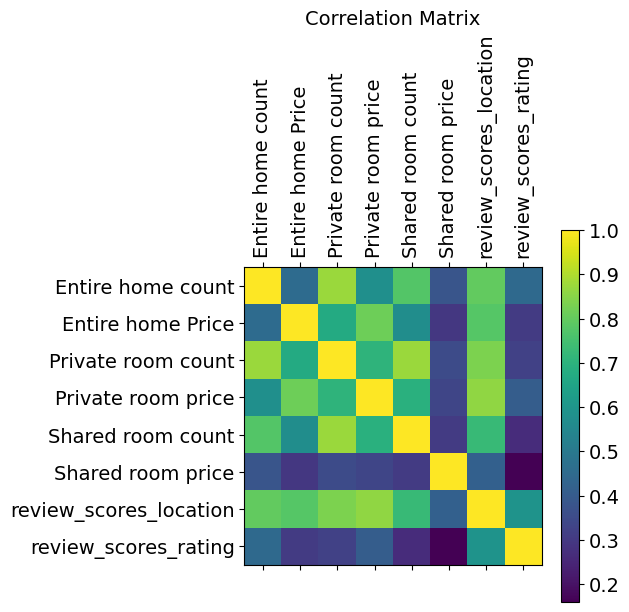

In [31]:
plt.matshow(nbhood_room_price_count.corr(), fignum=f.number) # type of plot
plt.xticks(range(nbhood_room_price_count.shape[1]), nbhood_room_price_count.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(nbhood_room_price_count.shape[1]), nbhood_room_price_count.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig(os.path.join(path2,"Average_PriceScore_Correlationmatrix.png"),bbox_inches='tight')

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


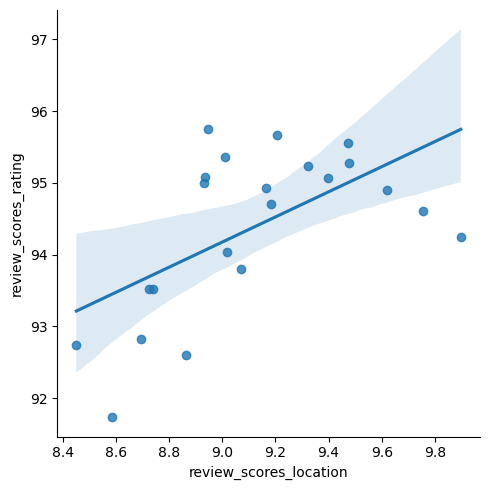

In [32]:
nbhood_av_location_rating = sns.lmplot(x = 'review_scores_location', y = 'review_scores_rating', data = nbhood_room_price_count)
nbhood_av_location_rating.figure.savefig(os.path.join(path2,'Line_nbhood_av_location_rating.png'),bbox_inches='tight')
nbhood_av_location_rating

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


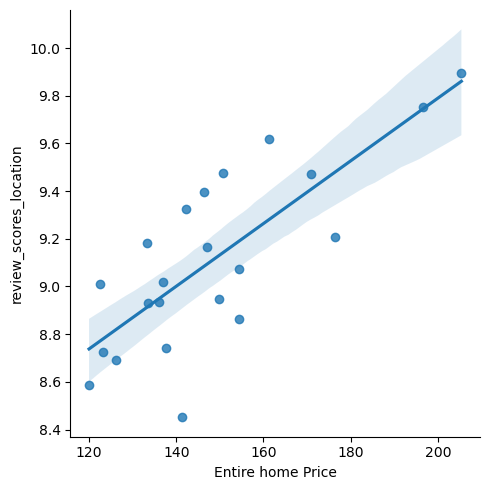

In [33]:
nbhood_av_homeprice_location = sns.lmplot(x = 'Entire home Price', y = 'review_scores_location', data = nbhood_room_price_count)
nbhood_av_homeprice_location.figure.savefig(os.path.join(path2,'Line_nbhood_av_homeprice_location.png'),bbox_inches='tight')
nbhood_av_homeprice_location

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


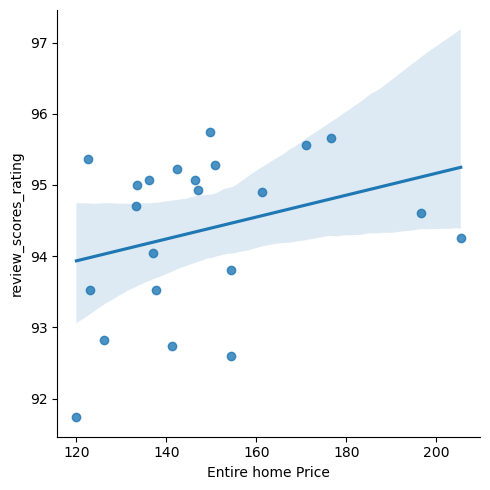

In [34]:
nbhood_av_homeprice_rating = sns.lmplot(x = 'Entire home Price', y = 'review_scores_rating', data = nbhood_room_price_count)
nbhood_av_homeprice_rating.figure.savefig(os.path.join(path2,'Line_nbhood_av_homeprice_rating.png'),bbox_inches='tight')
nbhood_av_homeprice_rating

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


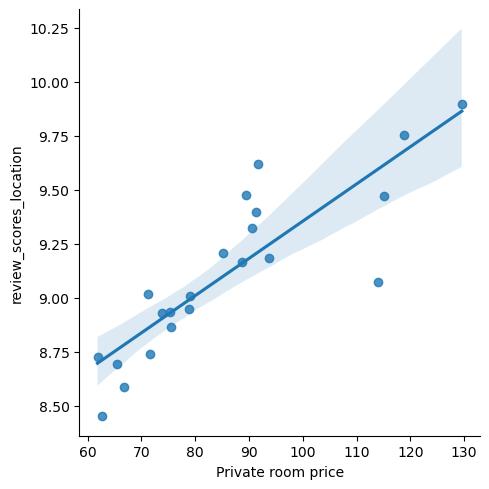

In [35]:
nbhood_av_privateprice_location = sns.lmplot(x = 'Private room price', y = 'review_scores_location', data = nbhood_room_price_count)
nbhood_av_privateprice_location.figure.savefig(os.path.join(path2,'Line_nbhood_av_privateprice_location.png'),bbox_inches='tight')
nbhood_av_privateprice_location

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


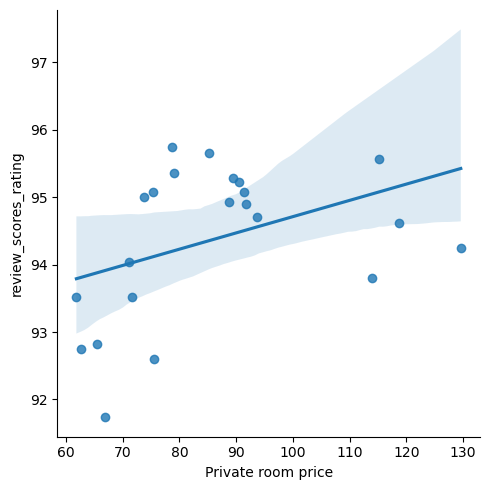

In [36]:
nbhood_av_privateprice_rating = sns.lmplot(x = 'Private room price', y = 'review_scores_rating', data = nbhood_room_price_count)
nbhood_av_privateprice_rating.figure.savefig(os.path.join(path2,'Line_nbhood_av_privateprice_rating.png'),bbox_inches='tight')
nbhood_av_privateprice_rating

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


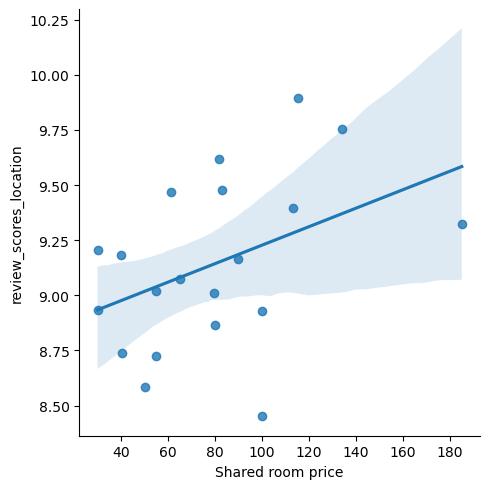

In [37]:
nbhood_av_sharedprice_location = sns.lmplot(x = 'Shared room price', y = 'review_scores_location', data = nbhood_room_price_count)
nbhood_av_sharedprice_location.figure.savefig(os.path.join(path2,'Line_nbhood_av_sharedprice_location.png'),bbox_inches='tight')
nbhood_av_sharedprice_location

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


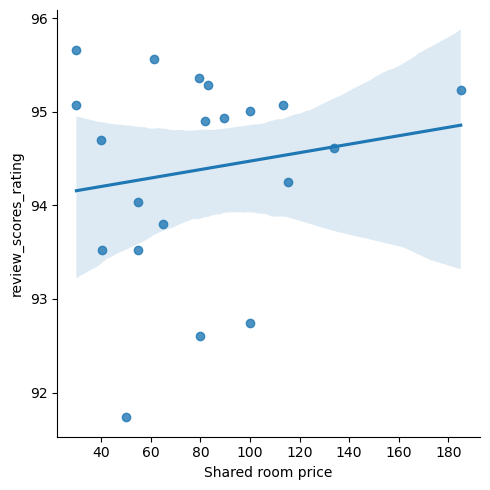

In [38]:
nbhood_av_sharedprice_rating = sns.lmplot(x = 'Shared room price', y = 'review_scores_rating', data = nbhood_room_price_count)
nbhood_av_sharedprice_rating.figure.savefig(os.path.join(path2,'Line_nbhood_av_sharedprice_rating.png'),bbox_inches='tight')
nbhood_av_sharedprice_rating

### Section 3.

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

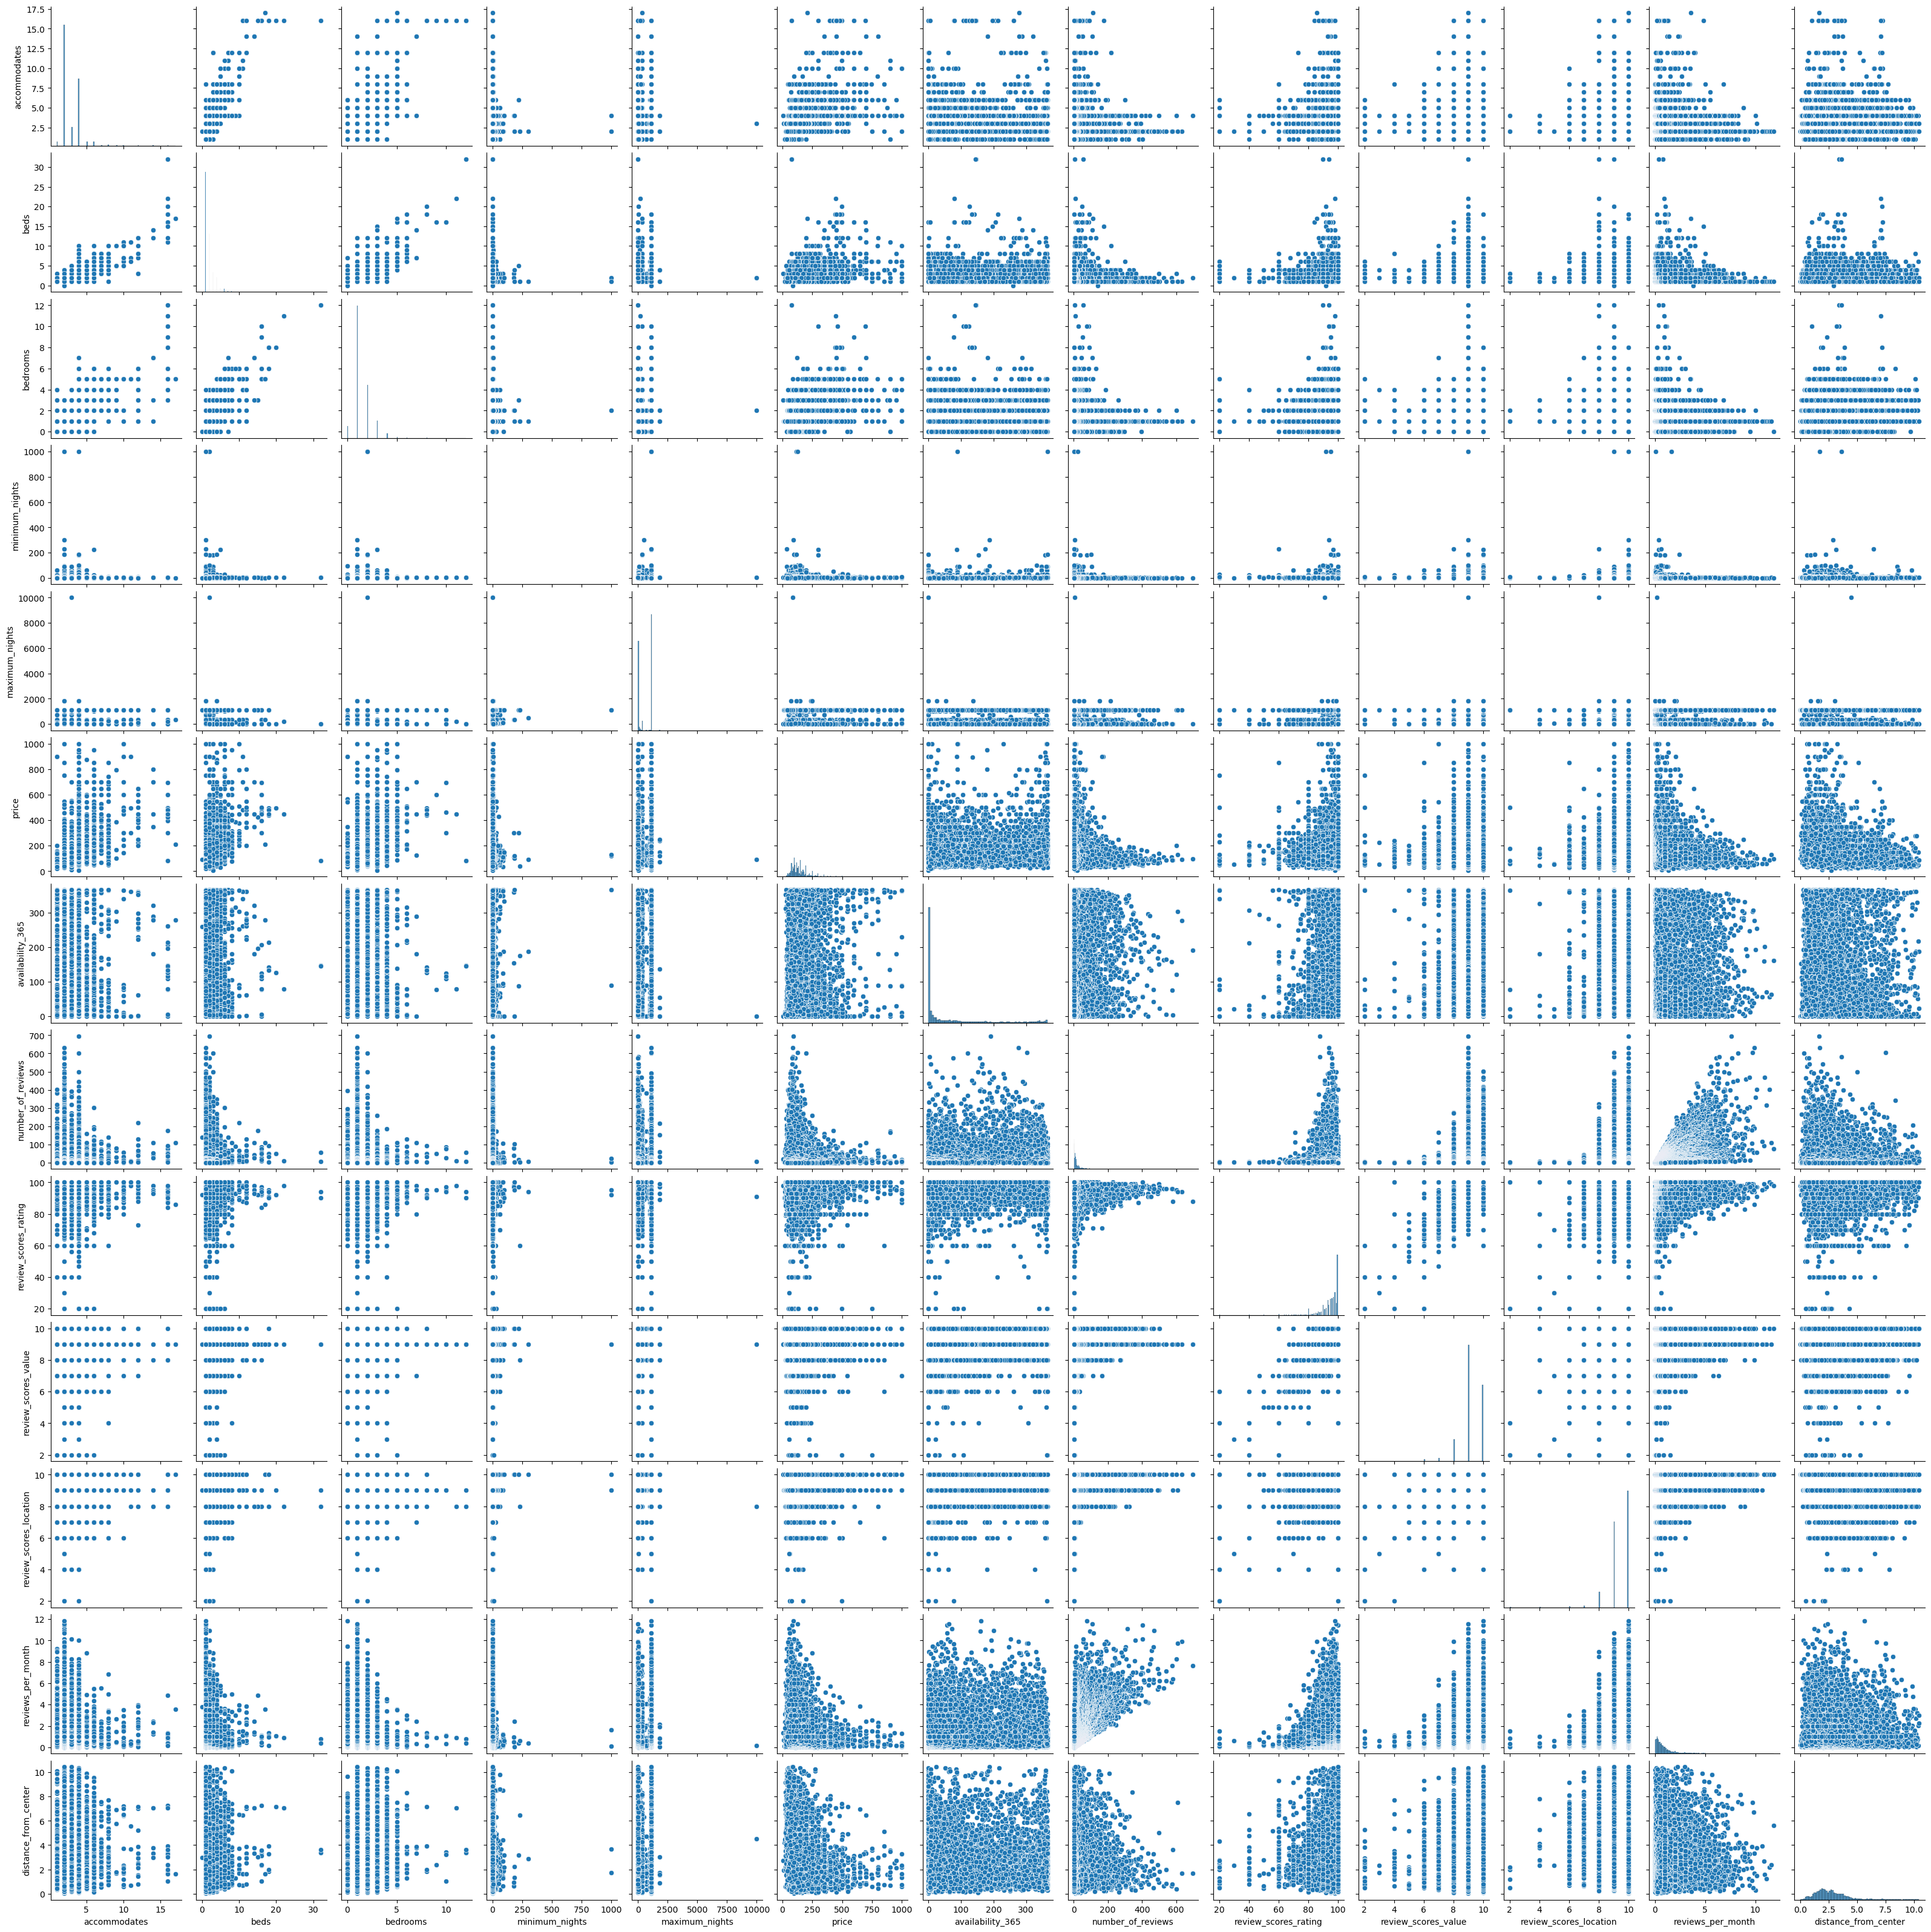

In [39]:
#As per CF request, the original subset (used for the preliminary correlation heatmap) has 
# been plotted - though legibility is hindered by the quantity (12 x 12).
p_plot = sns.pairplot(listings_quant)
p_plot

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

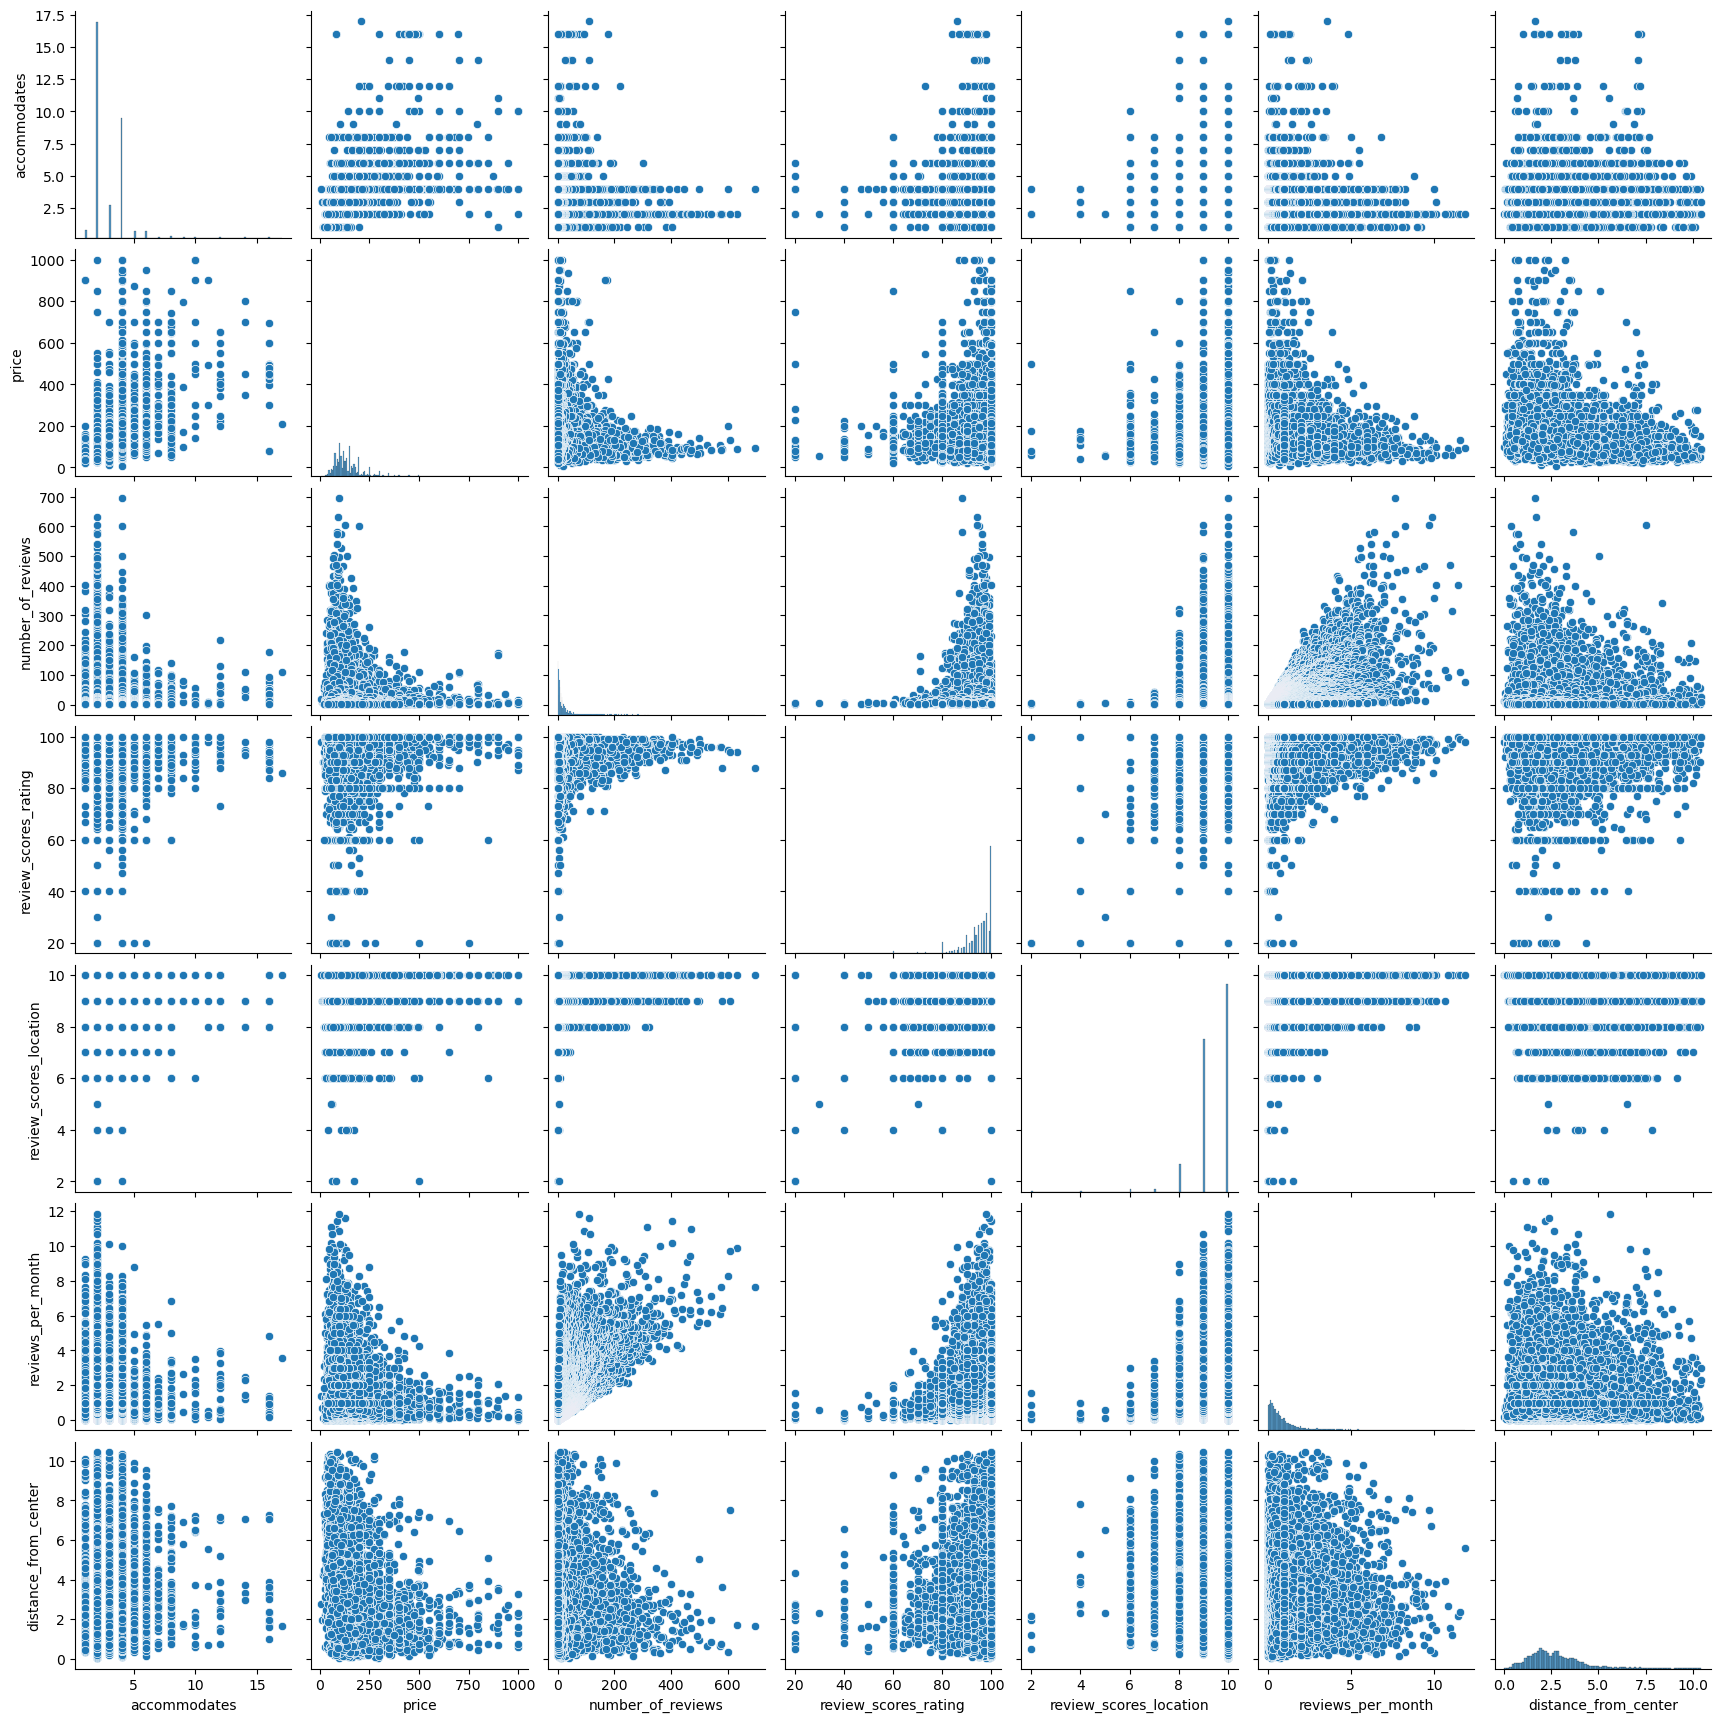

In [40]:
#Creating a new subset of the few relevant fields:

pplot_listings_sub = listings[['accommodates','price','number_of_reviews','review_scores_rating','review_scores_location','reviews_per_month','distance_from_center']]
p_plot2 = sns.pairplot(pplot_listings_sub)
p_plot2.figure.savefig(os.path.join(path2, 'pair_plot.png'),bbox_inches='tight')
p_plot2

#### Comments on Output (arranged row by row, not repeating previously discussed relationships, around 15 or so relationships):

- Accomodates: Accommodates = Value frequency rather narrow, after 5/6 guests, the frequency of values is practically imperceptible in the chart.   Price =  Large distribution, convergence of data points around 'cheaper' / lower capacity listings. Number Of Reviews: Interestingly, smaller properties tend to be reviewed more often, indicating that whilst there may represent the majority of the available listings, they are by far and away the most popular category. Review_scores_rating: It may just be because of the wider spead of options in the lower capacity section, but they have a significant larger count of reviews with lower ratings. Review Scores Location = This distribution makes me quite curious as there isn't any expected correlation between accommodation and location, yet the data indicates that larger properties tend to average higher location scores - realistically, there isn't a rational explanation for this - Bigger houses are usually found further out of the city so the location score would presumably trend lower (unless Amsterdam has great transport access and local ameneties, no matter the location)


- Price: Distribution has a right skewed-tail - We knew this previously and removed values above 1000. Number Of Reviews = As with accommodation, there are plenty more properties on the lower end of the market BUT they are also the most popular, Indicating that cheaper may lead to a higher quantity of rentals. Review Scores Rating =  similar response to accommodates / rating - same distibution. Review Score Location =  I'm not surprised by the distribution here, as prices tend to trend upwards when in a strong location.

- Number_of_Reviews: Review-scores_rating = This is quite interesting as it indicates that places with higher review scores, have a tendancy to be reviewed more often (of course meaning they are rented more often) this can imply that review score is a key factor in a customers decision to rent a specific listing. Review_Score_Location =  similar distribution as general rating - indicating that properties with higher scores tend to be rented out more frequently.

- Review_scores_rating: Location =  whilst the datapoints for this relationship are clustered in the top right, indicating that location plays a large part in a customers overall property review ranking, it's still evident that it's not the only factor. Even if a property is rated 10 in location, there is still a chance it'll only garner a 60 overall score if there are other less impressive aspects to the rental (and the inverse is true, high overall rating, even if the location is sub-par). 
- Reviews_per_location: Reviews_Per_Month = Similar to Number of reviews/ rating, customers tend to review higher rated properties more often, indicating that clients tend to rely on other ratings scores when deciding which property to rent out.

### Section 4:

#### We already created some catagories in the prior notebook, using std to define pricing groupings, aswell as property sizes. In this section we'll create a catagory plot using our 'group_size' catagory  to see the relationship between pricing and rating.

In [41]:
listings['pricing_tier'].value_counts(dropna = False)

pricing_tier
Mid-High-End    4507
Mid-Low-End     4504
Low             4368
High-End        3962
Name: count, dtype: int64

In [42]:
listings['group_size'].value_counts(dropna = False)

group_size
Small     9832
Medium    6729
Large      780
Name: count, dtype: int64

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


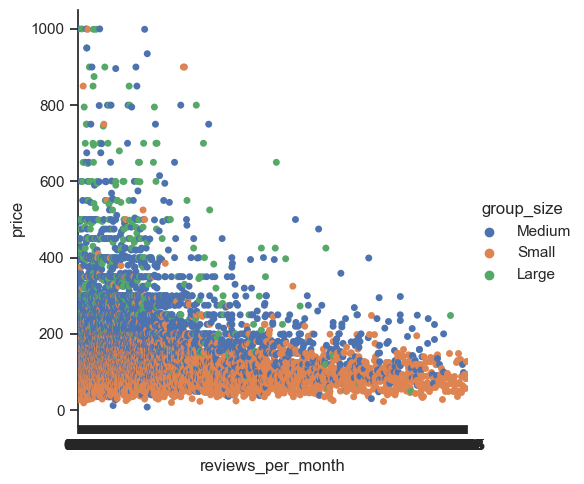

In [43]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="reviews_per_month", y="price", hue="group_size", data=listings)
g.figure.savefig(os.path.join(path2,'CategoricalPlot_Price_reviews_group.png'),bbox_inches='tight')
g

#### Because of the quantity of data points, the visualization is quite muddy and as a result the quantity of a particular grouping in a given area maybe hard to fully realise. that being said, there is quite a clear shift after the 200 Euro mark towards larger group size properties. We could have deduced this through the accommodation/price visualization created previously BUT, using this in tandem with reviews_per_month also hints at the frequency/popularity of particularly price points and group sizes. Above the 5 reviews per month point, it's the smaller groups and the cheaper properties that prove to be most dominant listings - and, as alluded to earlier by the ratings table, properties with higher ratings also appear to be an influence on how popular a listing is - whilst it's a little obvious to say, a 2 person property with a high score (subjective, and easier said than done of course) and in the 100-150 EURO price range will likely garner the most traffic.

### Section 5:

#### Revisting the questions outlined at the top of the page:

- 1. When does the rental market availability in Amsterdam Peak each year? (rental numbers, not revenue)
- 2. Which Months are the most expensive to visit amsterdam?
- 3. How does neighbourhood and property type impact price?
- 4. Which variables impact customer satisfacation the most?

#### For questions 1 & 2, I already have some of the relevant data cleaned and the code prepared for the bar chart or line graph which will represent the answers to these questions but we aren't ready to answer these as they are time-dependant variables which will be revisted in a later section.

#### For Question 3, I generally have an answer to this: Property Type and or Size has a rather drastic impact on price. using the property type variable (rather than just group Size) there is a 50 Euro Mean difference between listings which feature an entire home/apartment, instead of just a private room, followed by only a 10 Euro gap between a private room and a shared room (Though data for listings marked as 'shared rooms' is not particularly robust). As we can see from the Catagorical plot above, generalized group size also impacts price quite drastically with smaller 2 people listings making up the foundation of the available properties under the 180/200 Euro mark, Medium properties (3-4 guests) dominating the 200-400 Euro Segment, and then Larger 4+ guests appearing as the main type of datapoint above the 400 Euro mark (Though their prevelance in the overall DF is less than a 1/15th of the overall available listings). With this in mind, Neighbourhood also plays a pivot role in price expectations. Whilst there are some slight deviations, generally, properties within high ranking neighbourhoods (based on average location rating per neighbourhood, which is subjective rather than using a neighbourhood score based on objective criteria like number of shops, public transit options etc. etc.) are more costly. Regions like Centrum_west and centrum_oost have the highest scores and prices whilst bijlmer-oost which is ranked lowest in average client location rating, is the 3rd cheapest area to rent.

#### For Question 4, I've not yet identified the variables which impact customer satisfaction the most. In this section, using the pairplot data, we can see that generally speaking, properties tend to be rated quite well overall with the majority of properties ranking above an 80. At this stage, I'm slightly surprised that smaller properties are the only ones which tend to have instances of lower reviews scores. Smaller properties do saturate the market, so it's not unreasonable to expect that there are more bad apples in amongst the available listings, but the fact that larger, more expensive properties all rate above and 80 is quite surprising. To me, this perhaps indicates that larger properties or more premium listings are able to better meet the expectations of the customers using their services (or that customers are more knowledgable and understand what they are purchasing). Neighbourhood does slightly impact customer satisfaction. using the R value (correlation) and the scatterplot graph visualizations as evidence, it does seem to be that average property ratings do increase if a neighbourhood is generally ranked higher. Again, it must be re-iterated that both values stem from subjective data, but it's important to point out that location does indeed impact customer satisfaction.

#### Some new Questions (to use looking into time-series data):

- How does time of year impact customer satisfaction? (review data, using score and month groupings)
- Do neighbourhood prices change between seasons? (... might it be cheaper to go to Neighbourhood X in summer, but Neighbourhood Y in winter?)

### CF Question 8
#### At this, point in time I don't yet have a research hypothesis to focus on as the project as a whole does not yet have a specific 'motivation'. There are definitely a multitude of additional questions that can be raised, and new ways of incoporating the extra data sets and subsequently performing textaual or time series hypothesis on, but there is no overarching theme or motivation such as 'I want to go to amsterdam; when in the year is the best time to go and which neighbourhood / property type will be best for me'.

Hopefully, These will be ironed out within the next section.